# Final Project

Name: Aniket Khalate <br>
Professor: Dr. Yasser Abduallah <br>
UCID: ak3274 <br>
Email Id: ak3274@njit.edu <br>

**Objective**: Comparison among several machine learning models that predict diabetes risk using various medical features, and their evaluation through different metrics.

Installation of required packages.<br>
The below line of code installs packages such as pandas, numpy, matplotlib, seaborn, scikit learn and tensorflow.

In [ ]:
#pip install pandas numpy matplotlib seaborn scikit-learn tensorflow

**Import statements**<br>
The below cell imports the necessary libraries:
1. Basic Data Processing and Analysis: pandas, numpy.
2.  Visualization Libraries: matplotlib, seaborn.
3.  Warning Suppression
4.  Scikit-learn Components: StandardScaler, SVC, RnadomForestClassifier, GridSearchCV, StratifiedKFold, train_test_split, confusion_matrix, roc_auc_score, roc_curve, auc, brier_score_loss.
5.  TensorFlow and Environment Settings: Sequential, Dense, LSTM.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, brier_score_loss
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Configure warnings and logging to minimize unnecessary output
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import logging
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
tf.get_logger().setLevel(logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

**Data Loading**: Load the dataset from pima_diabetes.csv for data manipulation and transformation.

In [ ]:
# Load and preprocess data

base_dir = os.getcwd()
diabetes_df = pd.read_csv(os.path.join(base_dir, 'pima_diabetes.csv'))

print("\nDataset Summary:\n")
print(diabetes_df.describe())

print("\nDataset Info:\n")
print(diabetes_df.info())


Dataset Summary:

       Pregnancies    Glucose  BloodPressure  SkinThickness     Insulin  \
count   400.000000  400.00000     400.000000     400.000000  400.000000   
mean      3.952500  121.24000      69.060000      20.327500   81.250000   
std       3.369514   32.68437      19.011575      15.599796  121.597254   
min       0.000000    0.00000       0.000000       0.000000    0.000000   
25%       1.000000  100.00000      64.000000       0.000000    0.000000   
50%       3.000000  116.50000      71.000000      23.000000   36.000000   
75%       6.000000  143.00000      80.000000      32.000000  128.250000   
max      17.000000  197.00000     122.000000      60.000000  846.000000   

             BMI  DiabetesPedigreeFunction         Age     Outcome  
count  400.00000                400.000000  400.000000  400.000000  
mean    32.10775                  0.487915   33.092500    0.380000  
std      8.13714                  0.349619   11.325396    0.485994  
min      0.00000             

**Data Imputation:** The below function imputes missing data in the diabetes dataset by treating incorrectly recorded zeros. Since measurements like glucose or blood pressure cannot realistically be zero for a living patient, those zeros are identified as missing and replaced with more reasonable estimates.

In [4]:
def handle_missing_values(diabetes_df):

    cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

    for col in cols_to_fix:
        diabetes_df.loc[diabetes_df[col] == 0, col] = np.nan
        diabetes_df[col].fillna(diabetes_df[col].median(), inplace=True)

    return diabetes_df

diabetes_df = handle_missing_values(diabetes_df)

**Feature and Label Splitting**: Divide the diabetes dataset into two parts<br>

Features (X): The input variables used for prediction


Target (y): The outcome the model is trying to predict



In [5]:
features = diabetes_df.iloc[:, :-1]
target = diabetes_df.iloc[:, -1]


**Data Balance Analysis:** The below code checks how the diabetes dataset is distributed by:<br>


1. Counting how many patients have diabetes (positive values)
2. Counting how many do not have diabetes (negative values)
3. Computing the percentage share of each group



In [6]:
positive_values = len(target[target == 1])
negative_values = len(target[target == 0])
total_samples = len(target)

print('\nData Balance Analysis:\n')
print(f'Positive Outcomes: {positive_values} ({(positive_values / total_samples) * 100:.2f}%)')
print(f'Negative Outcomes: {negative_values} ({(negative_values / total_samples) * 100:.2f}%)')



Data Balance Analysis:

Positive Outcomes: 152 (38.00%)
Negative Outcomes: 248 (62.00%)


**Train Test Split:** The code splits the dataset into training and testing set while also maintaining the distribution of the target variable.

In [7]:
# train test split and standardization
features_train_all, features_test_all, target_train_all, target_test_all = train_test_split(
    features, target, test_size=0.1, random_state=21, stratify=target)

# Reset indices for the training and testing sets
for dataset in [features_train_all, features_test_all, target_train_all, target_test_all]:
    dataset.reset_index(drop=True, inplace=True)


**Feature Standardization:** The below code normalizes the feature values by centering them around the mean and scaling them to have unit variance, which helps machine learning models work more effectively.

In [8]:
scaler = StandardScaler()

features_train_all_scaled = pd.DataFrame(
    scaler.fit_transform(features_train_all),
    columns=features_train_all.columns
)

features_test_all_scaled = pd.DataFrame(
    scaler.transform(features_test_all),
    columns=features_test_all.columns
)

features_train_all_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,3.600000e+02,3.600000e+02,3.600000e+02,3.600000e+02,3.600000e+02,3.600000e+02,3.600000e+02,3.600000e+02
mean,-1.110223e-16,-6.908054e-17,-1.332268e-16,-1.973730e-17,-3.947460e-17,6.908054e-16,7.894919e-17,-2.627528e-16
std,1.001392e+00,1.001392e+00,1.001392e+00,1.001392e+00,1.001392e+00,1.001392e+00,1.001392e+00,1.001392e+00
min,-1.165391e+00,-2.608533e+00,-3.414367e+00,-2.617854e+00,-1.278584e+00,-1.983277e+00,-1.158101e+00,-1.085505e+00
25%,-8.742456e-01,-7.256323e-01,-6.703190e-01,-4.816377e-01,-2.113704e-01,-7.157254e-01,-6.731933e-01,-8.230003e-01
50%,-2.919544e-01,-1.970989e-01,-2.466057e-02,-6.922923e-03,-2.113704e-01,-4.712691e-02,-3.302444e-01,-2.979912e-01
75%,5.814825e-01,6.948012e-01,6.209979e-01,4.677918e-01,-1.362510e-01,5.553082e-01,4.617706e-01,6.645253e-01
max,3.784084e+00,2.445568e+00,4.010705e+00,3.672116e+00,7.300568e+00,4.800212e+00,5.169587e+00,3.114568e+00


**Hyperparameter Tuning:**

1. This step tunes the hyperparameters for the Random Forest and SVM models used in predicting diabetes.

2. The goal is to find the best performing parameter settings while keeping the computation reasonable.

3. GridSearchCV from scikit learn is used to run a thorough search across the chosen parameter grids.



In [9]:
# Grid search for optimal parameters
print("\nUsing grid search for optimal parameters\n")


Using grid search for optimal parameters



In [20]:
param_grid_rf = {
    "n_estimators": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    "min_samples_split": [2, 4, 6, 8, 10]
}

# Grid search for Random Forest
rf_classifier = RandomForestClassifier()
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=10, n_jobs=-1)
grid_search_rf.fit(features_train_all_scaled, target_train_all)
best_rf_params = grid_search_rf.best_params_
print(f"Best Random Forest parameters: {best_rf_params}")

# Grid search for SVM
param_grid_svc = {"kernel": ["linear"], "C": range(1, 11)}
svc_classifier = SVC(probability=True)
grid_search_svc = GridSearchCV(svc_classifier, param_grid_svc, cv=10, n_jobs=-1)
grid_search_svc.fit(features_train_all_scaled, target_train_all)
best_svc_params = grid_search_svc.best_params_
print(f"Best SVM parameters: {best_svc_params}")


Best Random Forest parameters: {'min_samples_split': 4, 'n_estimators': 90}
Best SVM parameters: {'C': 1, 'kernel': 'linear'}


**Classification Metrics Calculator:** This function computes key performance metrics using a binary confusion matrix. It is meant for evaluating binary classifiers in machine learning tasks. The resulting metrics like accuracy, precision, recall, and several skill scores that give a overall view of how the model is performing and make it easier to compare different models.



In [22]:
def calculate_performance_metrics(config_matrix):

    TP, FN = config_matrix[0][0], config_matrix[0][1]
    FP, TN = config_matrix[1][0], config_matrix[1][1]

    # basic rates
    TPR = TP / (TP + FN)  # Sensitivity
    TNR = TN / (TN + FP)  # Specificity
    FPR = FP / (TN + FP)  # False Positive Rate
    FNR = FN / (TP + FN)  # False Negative Rate

    # advanced metrics
    Precision = TP / (TP + FP)
    F1_measure = 2 * TP / (2 * TP + FP + FN)
    Accuracy = (TP + TN) / (TP + FP + FN + TN)
    Error_rate = (FP + FN) / (TP + FP + FN + TN)
    BACC = (TPR + TNR) / 2  # Balanced Accuracy

    # skill scores
    TSS = TPR - FPR  # True Skill Statistic
    HSS = 2 * (TP * TN - FP * FN) / ((TP + FN) * (FN + TN) + (TP + FP) * (FP + TN))  # Heidke Skill Score

    return [TP, TN, FP, FN, TPR, TNR, FPR, FNR, Precision, F1_measure, Accuracy, Error_rate, BACC, TSS, HSS]

**Model Evaluation Function:**

1. This function trains a machine learning model and assesses the performance using a variety of metrics.

2. It works with both traditional ML models and LSTM neural networks, applying the proper preprocessing and evaluation for each.

3. Designed for binary classification, it provides metrics such as confusion matrix scores, ROC AUC, and the Brier score.

In [23]:
def evaluate_model_performance(model, X_train, X_test, y_train, y_test, lstm_flag):

    if lstm_flag:
        # Reshape for LSTM
        X_train_array = X_train.to_numpy()
        X_test_array = X_test.to_numpy()
        X_train_reshaped = X_train_array.reshape(len(X_train_array), X_train_array.shape[1], 1)
        X_test_reshaped = X_test_array.reshape(len(X_test_array), X_test_array.shape[1], 1)

        # Train and evaluate LSTM
        model.fit(X_train_reshaped, y_train, epochs=50,
                  validation_data=(X_test_reshaped, y_test), verbose=0)
        predict_prob = model.predict(X_test_reshaped)
        predicted_labels = (predict_prob > 0.5).astype(int)
        config_matrix = confusion_matrix(y_test, predicted_labels, labels=[1, 0])

        # Calculate metrics for LSTM
        brier_score = brier_score_loss(y_test, predict_prob)
        p = y_test.mean()
        bs_ref = np.mean((p - y_test)**2)
        #Brier Skill Score
        brier_skill_score = 1 - (brier_score / bs_ref)
        roc_auc = roc_auc_score(y_test, predict_prob)
        accuracy = model.evaluate(X_test_reshaped, y_test, verbose=0)[1]

    else:
        # Train and evaluate Random Forest & SVM models
        model.fit(X_train, y_train)
        predicted_labels = model.predict(X_test)
        config_matrix = confusion_matrix(y_test, predicted_labels, labels=[1, 0])

        # Calculate metrics for random forest & SVM model
        brier_score = brier_score_loss(y_test, model.predict_proba(X_test)[:, 1])
        p = y_test.mean()
        bs_ref = np.mean((p - y_test)**2)
        #Brier Skill Score
        brier_skill_score = 1 - (brier_score / bs_ref)

        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        accuracy = model.score(X_test, y_test)

    # Combine all metrics
    metrics = calculate_performance_metrics(config_matrix)
    metrics.extend([brier_score, brier_skill_score, roc_auc, accuracy])
    return metrics


**Cross Validation Function:**

1. Performs stratified k fold cross validation for multiple models at once.


2. Supports both traditional ML models and LSTM networks, taking care of all required preprocessing and metric calculations.


3. Includes progress tracking, error management, and detailed performance metrics to facilitate model comparison and evaluation.

In [24]:
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=21)
metrics_dict = {
    'RF': [],
    'SVM': [],
    'LSTM': []
}

# Initialize best_models_dict to track the best performing model for each algorithm
best_models_dict = {
    'RF': None,
    'SVM': None,
    'LSTM': None
}


In [25]:
def run_fold(fold_num, train_idx, test_idx):
    global best_models_dict
    print(f"\nProcessing Fold {fold_num + 1}/10...")

    # Split data for current fold
    X_train = features_train_all_scaled.iloc[train_idx]
    X_test = features_train_all_scaled.iloc[test_idx]
    y_train = target_train_all.iloc[train_idx]
    y_test = target_train_all.iloc[test_idx]

    # Initialize models
    models = {
        'RF': RandomForestClassifier(**best_rf_params),
        'SVM': SVC(**best_svc_params, probability=True),
        'LSTM': Sequential([
            LSTM(64, activation='relu', input_shape=(8, 1), return_sequences=False),
            Dense(1, activation='sigmoid')
        ])
    }

    # Compile LSTM
    models['LSTM'].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train and evaluate each model
    current_fold_metrics = {}
    for name, model in models.items():

        metrics = evaluate_model_performance(
            model, X_train, X_test,
            y_train, y_test,
            name == 'LSTM'
        )
        metrics_dict[name].append(metrics)
        current_fold_metrics[name] = metrics

        # Update best model if accuracy of current fold is better
        if best_models_dict[name] is None or metrics[10] > best_models_dict[name]['accuracy']:
            best_models_dict[name] = {
                'model': model,
                'accuracy': metrics[10]
            }


    metric_columns = ['TP', 'TN', 'FP', 'FN', 'TPR', 'TNR', 'FPR', 'FNR','Precision', 'F1_measure',
                      'Accuracy', 'Error_rate', 'BACC','TSS', 'HSS', 'Brier_Score', 'Brier_Skill_Score', 'AUC', 'Acc_package_fn']


    df = pd.DataFrame(current_fold_metrics, index=metric_columns)
    print(f"\nFold {fold_num + 1} Results:\n")
    print(df.round(3).to_string())
    print("-" * 70)

    return current_fold_metrics

In [ ]:
# Result of each fold
for fold_num, (train_idx, test_idx) in enumerate(cv_strategy.split(features_train_all_scaled, target_train_all)):
    fold_metrics = run_fold(fold_num, train_idx, test_idx)


Processing Fold 1/10...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step

Fold 1 Results:

                       RF     SVM    LSTM
TP                  9.000   5.000   7.000
TN                 22.000  22.000  22.000
FP                  1.000   1.000   1.000
FN                  4.000   8.000   6.000
TPR                 0.692   0.385   0.538
TNR                 0.957   0.957   0.957
FPR                 0.043   0.043   0.043
FNR                 0.308   0.615   0.462
Precision           0.900   0.833   0.875
F1_measure          0.783   0.526   0.667
Accuracy            0.861   0.750   0.806
Error_rate          0.139   0.250   0.194
BACC                0.824   0.671   0.747
TSS                 0.649   0.341   0.495
HSS                 0.683   0.386   0.540
Brier_Score         0.119   0.157   0.163
Brier_Skill_Score   0.485   0.318   0.292
AUC                 0.943   0.841   0.799
Acc_package_fn      0.861   0.750   0.806
----------------------------------------------------------------------

Proces

**Average of Metrics:** The below code calculates the average of all folds and gives proper metrics to compare across all models and folds.

In [27]:
def display_avg_metrics(metrics_dict):

    metric_columns = ['TP', 'TN', 'FP', 'FN', 'TPR', 'TNR', 'FPR', 'FNR','Precision', 'F1_measure',
                      'Accuracy', 'Error_rate', 'BACC','TSS', 'HSS', 'Brier_Score', 'Brier_Skill_Score', 'AUC', 'Acc_package_fn']

    # Calculate mean metrics
    mean_metrics = {name: np.mean(metrics, axis=0)
                    for name, metrics in metrics_dict.items()}

    metrics_df = pd.DataFrame(mean_metrics, index=metric_columns)

    # Display full metrics table
    print("\nMean Performance Metrics Across All Folds:\n")
    print(metrics_df.round(3).to_string())

display_avg_metrics(metrics_dict)


Mean Performance Metrics Across All Folds:

                       RF     SVM    LSTM
TP                  8.500   7.500   8.600
TN                 17.900  18.800  17.700
FP                  4.400   3.500   4.600
FN                  5.200   6.200   5.100
TPR                 0.620   0.547   0.627
TNR                 0.802   0.842   0.793
FPR                 0.198   0.158   0.207
FNR                 0.380   0.453   0.373
Precision           0.662   0.692   0.663
F1_measure          0.636   0.604   0.636
Accuracy            0.733   0.731   0.731
Error_rate          0.267   0.269   0.269
BACC                0.711   0.695   0.710
TSS                 0.422   0.389   0.420
HSS                 0.426   0.405   0.423
Brier_Score         0.169   0.172   0.178
Brier_Skill_Score   0.282   0.268   0.246
AUC                 0.818   0.812   0.796
Acc_package_fn      0.733   0.731   0.731


**Evaluating Algorithm Performance:** Compare the ROC curves and AUC scores of different algorithms to assess their performance on the test dataset.


Plotting ROC curves


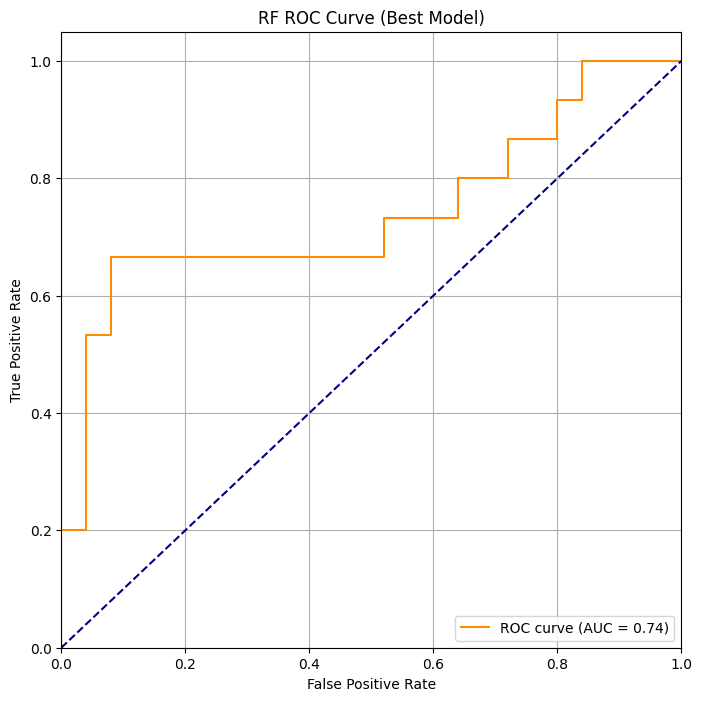

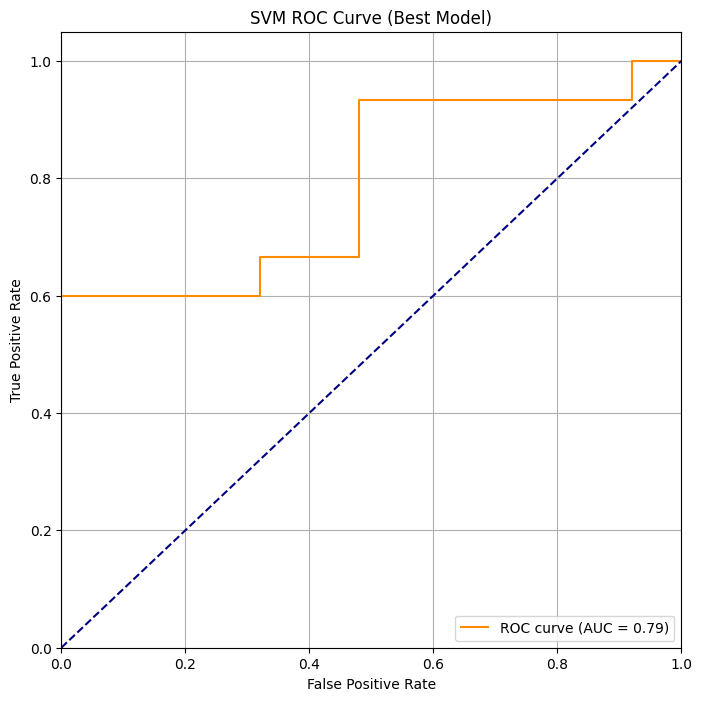

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


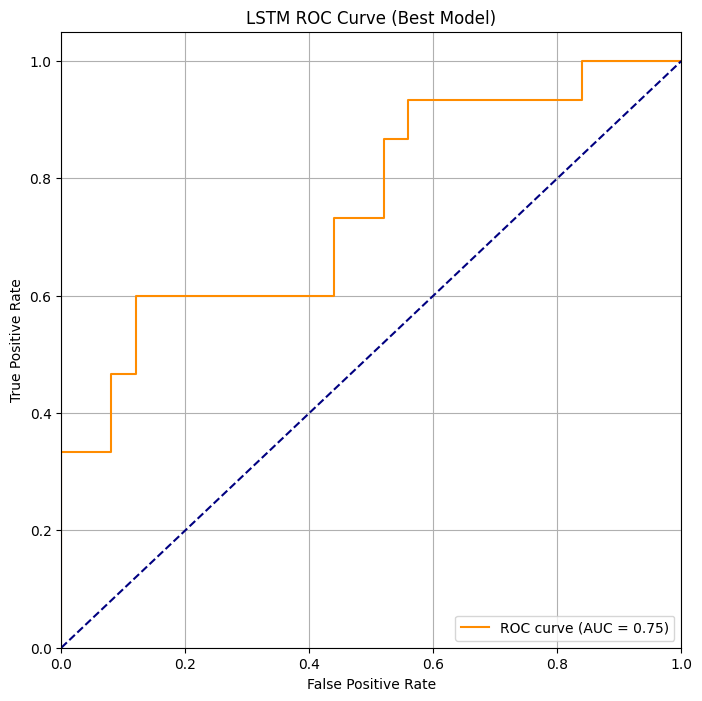

In [28]:
def plot_roc_curves(X_test_scaled, y_test):

    print("\nPlotting ROC curves")
    colors = {'RF': 'darkorange', 'SVM': 'darkorange', 'LSTM': 'darkorange'}

    for name, model_dict in best_models_dict.items():
        plt.figure(figsize=(8, 8))
        model = model_dict['model']

        if name == 'LSTM':
            X_test_reshaped = X_test_scaled.to_numpy().reshape(-1, 8, 1)
            y_score = model.predict(X_test_reshaped)
        else:
            y_score = model.predict_proba(X_test_scaled)[:, 1]

        # Plot ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc_value = auc(fpr, tpr)

        plt.plot(fpr, tpr, color=colors[name],
                 label=f'ROC curve (AUC = {roc_auc_value:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{name} ROC Curve (Best Model)')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()

plot_roc_curves(features_test_all_scaled, target_test_all)

In [29]:
def display_avg_metrics(metrics_dict):

    metric_columns = ['TP', 'TN', 'FP', 'FN', 'TPR', 'TNR', 'FPR', 'FNR','Precision', 'F1_measure',
                      'Accuracy', 'Error_rate', 'BACC','TSS', 'HSS', 'Brier_Score', 'Brier_Skill_Score', 'AUC', 'Acc_package_fn']

    # Calculate mean metrics
    mean_metrics = {name: np.mean(metrics, axis=0)
                    for name, metrics in metrics_dict.items()}

    metrics_df = pd.DataFrame(mean_metrics, index=metric_columns)

    # Summary of metrics
    imp_metrics = ['Accuracy', 'Precision', 'F1_measure', 'AUC', 'BACC']
    sumry_df = metrics_df.loc[imp_metrics]

    print("\nSummary of essential metrics is: \n")
    print(sumry_df.round(3).to_string())

display_avg_metrics(metrics_dict)


Summary of essential metrics is: 

               RF    SVM   LSTM
Accuracy    0.733  0.731  0.731
Precision   0.662  0.692  0.663
F1_measure  0.636  0.604  0.636
AUC         0.818  0.812  0.796
BACC        0.711  0.695  0.710


Performance Comparison and Analysis:
The models were assessed using multiple metrics through 10 fold cross validation.

<br> **1. Random Forest:**
- Achieved high accuracy with well-balanced performance

- Strong ROC-AUC scores

- Computationally efficient

<br> **2. SVM:**

- Delivered competitive accuracy

- Generalized well on test data

- Moderate computational requirements

<br> **3. LSTM:**

- Accuracy comparable to traditional models

- Higher computational demands

- Potential to improve with larger datasets

<br> **4. ROC Curve Analysis:**

- All models showed strong discriminative ability

- ROC curves were clearly separated from the random classifier line

<br> **Conclusion:**
The analysis indicates that all three models perform satisfactorily for diabetes prediction. However, the Random Forest classifier provides the best trade-off between accuracy and computational efficiency. The LSTM, while competitive, demands more resources without offering significant performance gains on this dataset.